In [762]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

4. Анализ результатов A/B-тестирования: кумулятивные метрики

In [763]:
ab_data = pd.read_csv('ab_data.csv')

In [764]:
ab_data.head()

,user_id,timestamp,group,converted
0,851104,2017-01-21,A,0
1,804228,2017-01-12,A,0
2,661590,2017-01-11,B,0
3,853541,2017-01-08,B,0
4,864975,2017-01-21,A,1


In [765]:
ab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290482 entries, 0 to 290481
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    290482 non-null  int64 
 1   timestamp  290482 non-null  object
 2   group      290482 non-null  object
 3   converted  290482 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 8.9+ MB


In [766]:
ab_data['timestamp'] = pd.to_datetime(ab_data['timestamp'], format='%Y-%m-%d')

In [767]:
daily_data = ab_data.groupby(['timestamp','group']).agg({
    'user_id':'count',
    'converted':'sum'
}).reset_index().rename(columns={'user_id': 'users_count'})
daily_data.head()

,timestamp,group,users_count,converted
0,2017-01-02,A,2851,357
1,2017-01-02,B,2848,339
2,2017-01-03,A,6584,749
3,2017-01-03,B,6620,754
4,2017-01-04,A,6573,797


In [768]:
daily_data['conversion'] = daily_data['converted']/daily_data['users_count']*100

In [769]:
daily_data.head(10)

,timestamp,group,users_count,converted,conversion
0,2017-01-02,A,2851,357,12.521922
1,2017-01-02,B,2848,339,11.903090
2,2017-01-03,A,6584,749,11.376063
3,2017-01-03,B,6620,754,11.389728
4,2017-01-04,A,6573,797,12.125361
5,2017-01-04,B,6538,763,11.670236
6,2017-01-05,A,6419,791,12.322792
7,2017-01-05,B,6509,743,11.414964
8,2017-01-06,A,6604,762,11.538462
9,2017-01-06,B,6735,834,12.383073


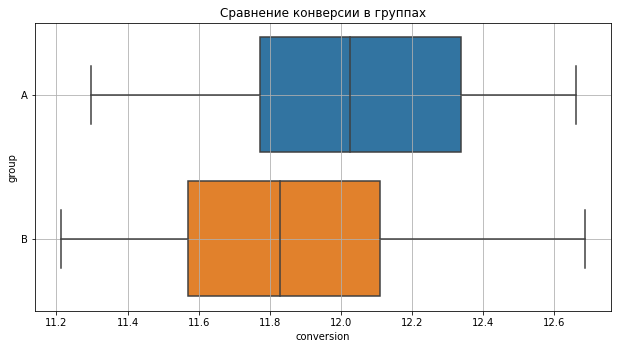

In [770]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4)) 
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1]) 
# строим boxplot для conversion по признаку group
sns.boxplot(data=daily_data, x='conversion', y='group', ax=ax) 
# задаём подпись к графику
ax.set_title('Сравнение конверсии в группах')
# задаём отображение сетки
ax.grid();

In [771]:
conversion_piv = daily_data.groupby('group')['conversion'].agg(
    ['mean', 'median']
)
display(conversion_piv)

,mean,median
group,,
A,12.032876,12.024261
B,11.872697,11.829582


график кумулятивной конверсии, где за каждый день отображаются данные накопленным итогом.

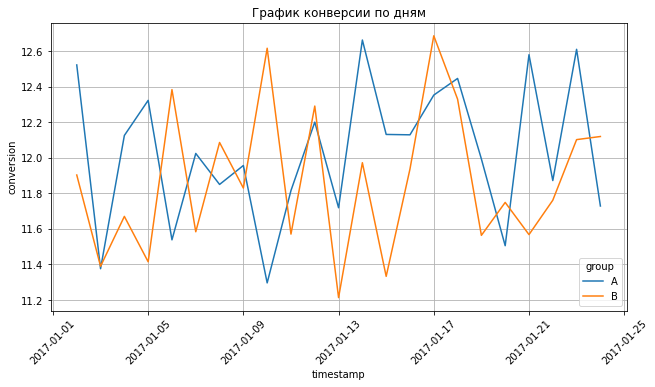

In [772]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для конверсии во времени в каждой группе
sns.lineplot(
    data=daily_data,
    x='timestamp',
    y='conversion',
    hue='group', 
    ax=ax
)
# задаём подпись к графику
ax.set_title('График конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation=45)
# задаём отображение сетки
ax.grid();

Выберем данные для группы А и создадим в полученной таблице новый столбец cum_users_count, в который запишем результат работы метода cumsum() по столбцу users_count:

In [773]:
# выделяем данные группы А
daily_data_a = daily_data[daily_data['group'] == 'A']
# считаем кумулятивное количество посетителей
daily_data_a.loc[:, 'cum_users_count'] = daily_data_a['users_count'].cumsum()
# выводим время, количество посетителей и кумулятивное количество посетителей
display(daily_data_a[['timestamp', 'users_count', 'cum_users_count']].head())

C:\Users\pavel\AppData\Local\Temp\ipykernel_16204\906787284.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data_a.loc[:, 'cum_users_count'] = daily_data_a['users_count'].cumsum()


,timestamp,users_count,cum_users_count
0,2017-01-02,2851,2851
2,2017-01-03,6584,9435
4,2017-01-04,6573,16008
6,2017-01-05,6419,22427
8,2017-01-06,6604,29031


Как сделать такой расчёт для двух групп (А и B) сразу? Воспользуемся методом groupby: сгруппируем данные по признаку группы, и в каждой группе будем вычислять кумулятивные суммы признаков количества посетителей (users_count) и количества совершённых целевых действий (converted). 

In [774]:
# вычисляем кумулятивную сумму количества посетителей
daily_data['cum_users_count'] = daily_data.groupby(['group'])['users_count'].cumsum()
# вычисляем кумулятивную сумму количества совершённых целевых действий
daily_data['cum_converted'] = daily_data.groupby(['group'])['converted'].cumsum()
# вычисляем кумулятивную конверсию
daily_data['cum_conversion'] = daily_data['cum_converted']/daily_data['cum_users_count'] * 100
display(daily_data.head())

,timestamp,group,users_count,converted,conversion,cum_users_count,cum_converted,cum_conversion
0,2017-01-02,A,2851,357,12.521922,2851,357,12.521922
1,2017-01-02,B,2848,339,11.903090,2848,339,11.903090
2,2017-01-03,A,6584,749,11.376063,9435,1106,11.722311
3,2017-01-03,B,6620,754,11.389728,9468,1093,11.544149
4,2017-01-04,A,6573,797,12.125361,16008,1903,11.887806


А теперь построим графики кумулятивной конверсии по дням в каждой группе:

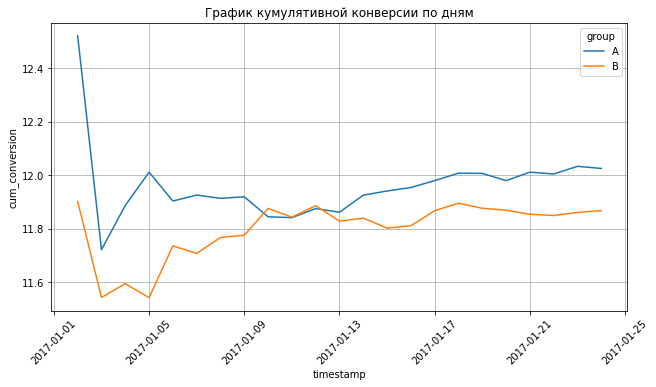

In [775]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='timestamp', y='cum_conversion', data=daily_data, hue='group', ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

In [776]:
sample_a = pd.read_csv('ab_test-redesign_sample_a.csv')
sample_b = pd.read_csv('ab_test-redesign_sample_b.csv')


In [777]:
sample_a['date'] = pd.to_datetime(sample_a['date'], format='%Y-%m-%d')
sample_b['date'] = pd.to_datetime(sample_b['date'], format='%Y-%m-%d')

In [778]:
sample_a_a = sample_a.groupby(['date','group']).agg({
    'cid':'count',
    'transactions':'sum',
    'revenue':'sum'
}).reset_index().rename(columns={'cid': 'users_count'})
sample_a_a.head()

,date,group,users_count,transactions,revenue
0,2020-11-06,A,2576,16,1577279
1,2020-11-07,A,2704,23,1721886
2,2020-11-08,A,3354,25,846051
3,2020-11-09,A,3234,18,708830
4,2020-11-10,A,3022,29,826984


In [779]:
sample_b_b = sample_b.groupby(['date','group']).agg({
    'cid':'count',
    'transactions':'sum',
    'revenue':'sum'
}).reset_index().rename(columns={'cid': 'users_count'})
sample_b_b.head()

,date,group,users_count,transactions,revenue
0,2020-11-06,B,2499,19,996645
1,2020-11-07,B,2804,19,555499
2,2020-11-08,B,3291,24,3044842
3,2020-11-09,B,3062,25,1285836
4,2020-11-10,B,3072,30,2414726


In [780]:
# считаем кумулятивное количество посетителей
sample_a_a['cum_users_count'] = sample_a_a['users_count'].cumsum()
sample_a_a['cum_transactions'] = sample_a_a['transactions'].cumsum()
sample_a_a['cum_revenue'] = sample_a_a['revenue'].cumsum()
display(sample_a_a[['cum_users_count', 'cum_transactions', 'cum_revenue']].head())



,cum_users_count,cum_transactions,cum_revenue
0,2576,16,1577279
1,5280,39,3299165
2,8634,64,4145216
3,11868,82,4854046
4,14890,111,5681030


In [781]:
# считаем кумулятивное количество посетителей
sample_b_b['cum_users_count'] = sample_b_b['users_count'].cumsum()
sample_b_b['cum_transactions'] = sample_b_b['transactions'].cumsum()
sample_b_b['cum_revenue'] = sample_b_b['revenue'].cumsum()

display(sample_b_b[['cum_users_count', 'cum_transactions', 'cum_revenue']].head())

,cum_users_count,cum_transactions,cum_revenue
0,2499,19,996645
1,5303,38,1552144
2,8594,62,4596986
3,11656,87,5882822
4,14728,117,8297548


In [782]:
sample_a_a['cum_avg_check'] =sample_a_a['cum_revenue']/sample_a_a['cum_transactions']
sample_b_b['cum_avg_check'] =sample_b_b['cum_revenue']/sample_b_b['cum_transactions']

In [783]:
sample_a_a['cum_conversion'] = sample_a_a['cum_transactions']/sample_a_a['cum_users_count'] * 100
sample_b_b['cum_conversion'] = sample_b_b['cum_transactions']/sample_b_b['cum_users_count'] * 100


In [784]:
round(sample_a_a['cum_conversion'].mean(),2), round(sample_b_b['cum_conversion'].mean(),2)



(0.71, 0.76)

In [785]:
sample_a_a.head()

,date,group,users_count,transactions,revenue,cum_users_count,cum_transactions,cum_revenue,cum_avg_check,cum_conversion
0,2020-11-06,A,2576,16,1577279,2576,16,1577279,98579.937500,0.621118
1,2020-11-07,A,2704,23,1721886,5280,39,3299165,84593.974359,0.738636
2,2020-11-08,A,3354,25,846051,8634,64,4145216,64769.000000,0.741256
3,2020-11-09,A,3234,18,708830,11868,82,4854046,59195.682927,0.690934
4,2020-11-10,A,3022,29,826984,14890,111,5681030,51180.450450,0.745467


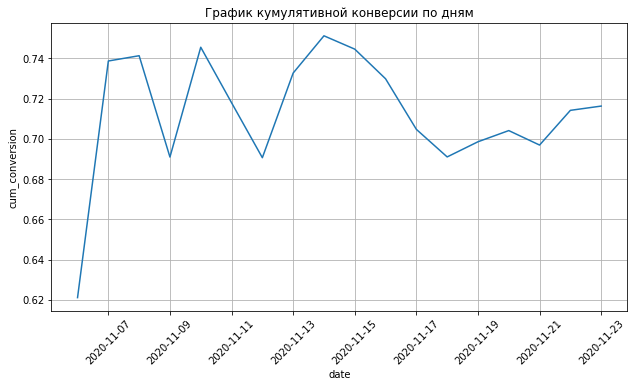

In [786]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='date', y='cum_conversion', data=sample_a_a, ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

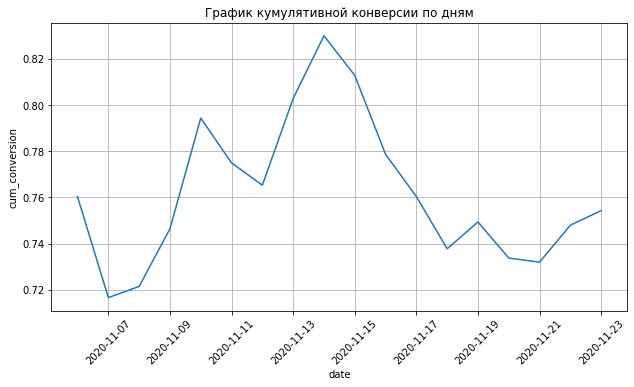

In [787]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='date', y='cum_conversion', data=sample_b_b, ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

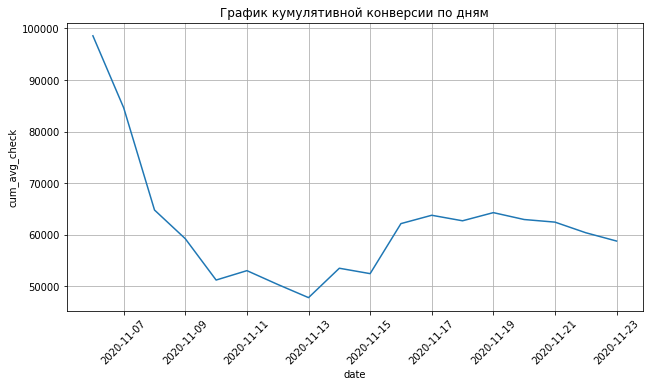

In [788]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='date', y='cum_avg_check', data=sample_a_a, ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

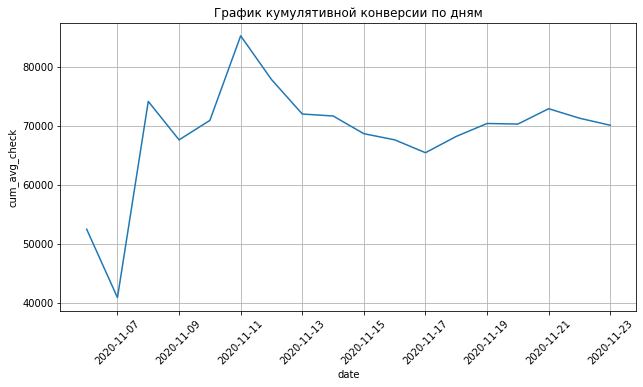

In [789]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='date', y='cum_avg_check', data=sample_b_b, ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

In [790]:
from statsmodels.stats.proportion import proportions_ztest

5. Анализ результатов A/B-тестирования: статистические тесты

In [791]:
# объединяем таблицы sample_a и sample_b
sample_a['group'] = 'A'
sample_b['group'] = 'B'
a_b = pd.concat([sample_a, sample_b])


converted_a_b = a_b.groupby('group')['transactions', 'cid'].agg('sum')

# проводим ztest для пропорций
Ho = 'Конверсии в группах равны.'
Ha = 'Конверсия в группе А меньше, чем в группе В.'
# альтернативная левосторонняя гипотеза

alpha = 0.05

_, p_value = proportions_ztest(
    count = converted_a_b['transactions'],
    nobs = converted_a_b['cid'],
    alternative='smaller'
)

print('p-value:', round(p_value, 2))

if (p_value < alpha):
    print('Принимаем альтернативную гипотезу. {}'.format(Ha))
else:
    print('Принимаем нулевую гипотезу. {}'.format(Ho))

p-value: 0.22
Принимаем нулевую гипотезу. Конверсии в группах равны.


C:\Users\pavel\AppData\Local\Temp\ipykernel_16204\788257685.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  converted_a_b = a_b.groupby('group')['transactions', 'cid'].agg('sum')


In [792]:
from scipy.stats import shapiro
# нулевая и альтернативная гипотезы
H0 = 'Распределения в обеих группах нормальные'
H1 = 'Распределение в одной или обеих группах отлично от нормального'
alpha = 0.1 # уровень значимости
# вычисляем результат теста Шапиро-Уилка для выборок
shapiro_result_a = shapiro(sample_a_a['cum_avg_check'])
shapiro_result_b = shapiro(sample_b_b['cum_avg_check'])
print('p-value группы А', round(shapiro_result_a.pvalue, 2))
print('p-value группы B', round(shapiro_result_b.pvalue, 2))
# сравниваем полученное p-value с уровнем значимости
if shapiro_result_a.pvalue < alpha or shapiro_result_b.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))
 


p-value группы А 0.0
p-value группы B 0.0
Отвергаем нулевую гипотезу. Распределения в обеих группах нормальные
Альтернативная гипотеза. H1: Распределение в одной или обеих группах отлично от нормального


In [793]:
from scipy.stats import mannwhitneyu
# проводим mannwhitneyu для пропорций
Ho = 'Ежедневный средний чек в группе А равны с группой B.'
Ha = 'Ежедневный средний чек в группе А меньше, чем в группе B.'
alpha = 0.1 # уровень значимости
_, p_value = mannwhitneyu(sample_a_a['cum_avg_check'], sample_b_b['cum_avg_check'])
print(p_value)

print('p-value:', round(p_value, 2))

if (p_value < alpha):
    print('Принимаем альтернативную гипотезу. {}'.format(Ha))
else:
    print('Принимаем нулевую гипотезу. {}'.format(Ho))

0.0018307246496942306
p-value: 0.0
Принимаем альтернативную гипотезу. Ежедневный средний чек в группе А меньше, чем в группе B.


In [794]:
converted_piv= ab_data.groupby('group')['converted'].agg(
    ['sum', 'count']
)
display(converted_piv)

,sum,count
group,,
A,17467,145241
B,17238,145241


In [795]:
# нулевая и альтернативная гипотезы
H0 = 'Конверсии в группах А и B равны'
H1 = 'Конверсия в группе А выше, чем конверсия в группе B'
alpha = 0.05 # уровень значимости
# вычисляем значение p-value для z-теста для пропорций
_, p_value = proportions_ztest(
    count=converted_piv['sum'], #число "успехов"
    nobs=converted_piv['count'], #общее число наблюдений
    alternative='larger',
)
# выводим результат на экран
print('p-value: ', round(p_value, 2))
# сравниваем полученное p-value с уровнем значимости
if (p_value < alpha): 
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))
 
# p-value:  0.1
# Принимаем нулевую гипотезу. Конверсии в группах А и B равны

p-value:  0.1
Принимаем нулевую гипотезу. Конверсии в группах А и B равны


In [796]:
time_data = pd.read_excel('time_data.xlsx')
display(time_data.head())

,time(A),time(B)
0,435.0,549.2
1,454.5,630.2
2,447.0,437.2
3,480.0,637.2
4,561.0,712.4


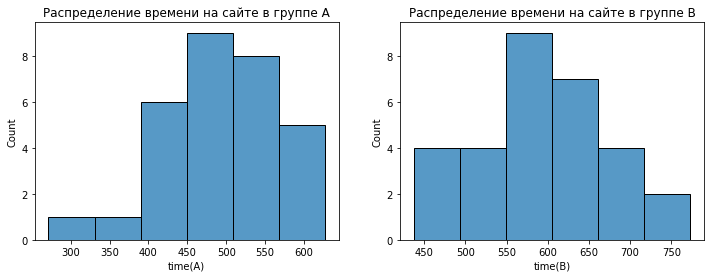

In [797]:
#создаём 2 графика размером 12x4
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
#строим гистограмму для времени на сайте в каждой группе
sns.histplot(x='time(A)', data=time_data, ax=axes[0])
sns.histplot(x='time(B)', data=time_data, ax=axes[1])
#задаём названия графикам
axes[0].set_title('Распределение времени на сайте в группе А');
axes[1].set_title('Распределение времени на сайте в группе B');

In [798]:
from scipy.stats import shapiro
# нулевая и альтернативная гипотезы
H0 = 'Распределения в обеих группах нормальные'
H1 = 'Распределение в одной или обеих группах отлично от нормального'
alpha = 0.05 # уровень значимости
# вычисляем результат теста Шапиро-Уилка для выборок
shapiro_result_a = shapiro(time_data['time(A)'])
shapiro_result_b = shapiro(time_data['time(B)'])
print('p-value группы А', round(shapiro_result_a.pvalue, 2))
print('p-value группы B', round(shapiro_result_b.pvalue, 2))
# сравниваем полученное p-value с уровнем значимости
if shapiro_result_a.pvalue < alpha or shapiro_result_b.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))
 
# p-value группы А 0.43
# p-value группы B 0.12
# Принимаем нулевую гипотезу. Распределения в обеих группах нормальные

p-value группы А 0.43
p-value группы B 0.12
Принимаем нулевую гипотезу. Распределения в обеих группах нормальные


In [799]:
from scipy.stats import ttest_ind
# нулевая и альтернативная гипотезы
H0 = 'Среднее время в группах одинаково'
H1 = 'Среднее время в группе А меньше, чем в группе B'
alpha = 0.05 #уровень значимости
#вычисляем результат T-теста для выборок
results = ttest_ind(
    a=time_data['time(A)'],
    b=time_data['time(B)'], 
    alternative='less'
)
print('p-value:', round(results.pvalue, 2))
 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))
 
# p-value: 0.0
# Отвергаем нулевую гипотезу. Среднее время в группах одинаково
# Альтернативная гипотеза. H1: Среднее время в группе А меньше, чем в группе B

p-value: 0.0
Отвергаем нулевую гипотезу. Среднее время в группах одинаково
Альтернативная гипотеза. H1: Среднее время в группе А меньше, чем в группе B
